In [1]:
# There are no categorical values in this data set, therefore, there is no need to create dummy features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading
data0 = pd.read_csv("a.us.txt")
data1 = pd.read_csv("aa.us.txt")
data2 = pd.read_csv("aaap.us.txt")
data3 = pd.read_csv("aaba.us.txt")
data4 = pd.read_csv("aac.us.txt")
data5 = pd.read_csv("aal.us.txt")
data6 = pd.read_csv("aamc.us.txt")
data7 = pd.read_csv("aame.us.txt")
data8 = pd.read_csv("aan.us.txt")
data9 = pd.read_csv("aaoi.us.txt")

# Create a list of the different stocks for later use
stock_list = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]

# We are storing the names of the different stocks that correspond to each data
names = ['a', 'aa', 'aaap', 'aaba', 'aac', 'aal', 'aamc', 'aame', 'aan', 'aaoi'] 

In [3]:
# Delete 'OpenInt' column since all values are 0 and therefore, irrelevant
for stock in stock_list:
    del stock['OpenInt']

In [4]:
data0.head()

,Date,Open,High,Low,Close,Volume
0,1999-11-18,30.713,33.754,27.002,29.702,66277506
1,1999-11-19,28.986,29.027,26.872,27.257,16142920
2,1999-11-22,27.886,29.702,27.044,29.702,6970266
3,1999-11-23,28.688,29.446,27.002,27.002,6332082
4,1999-11-24,27.083,28.309,27.002,27.717,5132147


In [5]:
# Create a new dataframe that just has the close prices in 2016
Close0 = data0[['Date', 'Close']]
start_date = '2016-01-01'
end_date = '2016-12-31'
Close0 = Close0[(data0['Date'] >= start_date) & (data0['Date'] <= end_date) ]
Close0 = Close0.reset_index(drop=True)
Close0 = Close0.set_index('Date')
Close0.head()

,Close
Date,
2016-01-04,39.979
2016-01-05,39.842
2016-01-06,40.018
2016-01-07,38.317
2016-01-08,37.916


In [6]:
# Create new variable future_days to predict 'x' amount of days in the future
future_days = 80

# Create a new column with shifted 'x' units/days up
Close0['Prediction'] = Close0[['Close']].shift(-future_days)
Close0.head()

,Close,Prediction
Date,,
2016-01-04,39.979,40.578
2016-01-05,39.842,40.321
2016-01-06,40.018,41.100
2016-01-07,38.317,40.638
2016-01-08,37.916,39.928


In [7]:
# NaN values are expected towards the tail end since those prices are unknown
Close0.tail()

,Close,Prediction
Date,,
2016-12-23,45.758,NaN
2016-12-27,46.065,NaN
2016-12-28,45.282,NaN
2016-12-29,45.334,NaN
2016-12-30,45.254,NaN


In [8]:
# We are dropping the last few rows that are NaN, or that last 'x' days
# Get the original 'Close' data
X = np.array(Close0.drop((['Prediction']), axis=1))[:-future_days]
print(X)
print(X.shape)

[[39.979]
 [39.842]
 [40.018]
 [38.317]
 [37.916]
 [37.278]
 [37.523]
 [36.216]
 [36.952]
 [36.463]
 [36.55 ]
 [36.608]
 [36.579]
 [37.315]
 [36.952]
 [36.856]
 [36.403]
 [35.48 ]
 [36.991]
 [37.031]
 [36.423]
 [36.54 ]
 [36.766]
 [35.411]
 [34.193]
 [34.751]
 [35.224]
 [34.713]
 [35.587]
 [36.433]
 [37.21 ]
 [36.54 ]
 [36.786]
 [37.365]
 [36.521]
 [36.826]
 [36.971]
 [36.933]
 [36.698]
 [37.916]
 [38.357]
 [38.515]
 [38.653]
 [38.741]
 [37.424]
 [37.464]
 [37.315]
 [38.545]
 [38.337]
 [37.622]
 [38.3  ]
 [38.604]
 [39.489]
 [38.957]
 [39.183]
 [38.78 ]
 [38.741]
 [38.829]
 [39.459]
 [39.419]
 [39.155]
 [39.719]
 [39.425]
 [38.687]
 [39.652]
 [38.892]
 [38.961]
 [38.833]
 [39.17 ]
 [40.095]
 [40.183]
 [40.311]
 [40.705]
 [40.794]
 [40.913]
 [41.317]
 [41.188]
 [41.021]
 [40.715]
 [40.973]
 [40.578]
 [40.321]
 [41.1  ]
 [40.638]
 [39.928]
 [40.36 ]
 [40.824]
 [40.724]
 [41.386]
 [41.839]
 [42.105]
 [41.997]
 [42.313]
 [43.759]
 [43.672]
 [43.909]
 [44.233]
 [43.919]
 [44.372]
 [44.756]


In [9]:
# Create the target values called 'y' and do not want the NaN data
y = np.array(Close0['Prediction'])[:-future_days]
print(y)
print(y.shape)

[40.578 40.321 41.1   40.638 39.928 40.36  40.824 40.724 41.386 41.839
 42.105 41.997 42.313 43.759 43.672 43.909 44.233 43.919 44.372 44.756
 44.844 45.149 45.218 45.277 45.228 45.052 45.188 45.082 45.476 45.417
 44.697 44.263 44.253 44.283 44.707 44.697 45.466 45.485 45.357 45.997
 43.475 41.643 42.479 43.121 43.826 44.064 43.224 43.935 43.886 44.933
 44.854 45.97  45.852 46.237 46.108 46.237 46.415 46.445 46.108 46.02
 45.585 46.385 46.692 46.938 47.532 47.293 46.612 46.523 46.267 46.918
 46.662 46.878 46.938 47.551 47.56  47.857 47.699 47.848 46.157 47.048
 47.008 47.245 46.138 46.692 46.751 47.048 46.573 46.415 46.425 46.435
 46.385 46.543 46.454 44.34  45.199 44.36  44.321 44.893 44.251 44.41
 45.159 45.486 46.108 46.05  46.01  46.138 46.612 45.852 46.639 46.689
 46.381 46.699 46.846 46.926 47.233 45.252 45.035 44.728 44.648 44.718
 45.006 45.579 45.608 45.133 45.412 43.094 42.955 42.965 42.805 43.152
 43.074 42.845 43.241 43.896 45.272 45.182 45.5   46.579 45.927 44.896
 44.966 

In [10]:
# Split data into 0.75 training and 0.25 testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
# Create decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, y_train)

# Create linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [12]:
# Get last 'x' rows of feature data set
x_future = Close0.drop(['Prediction'], axis=1)[:-future_days]

# Get the last 60 days of stock close prices
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)
print(x_future.shape)

[[42.313]
 [43.759]
 [43.672]
 [43.909]
 [44.233]
 [43.919]
 [44.372]
 [44.756]
 [44.844]
 [45.149]
 [45.218]
 [45.277]
 [45.228]
 [45.052]
 [45.188]
 [45.082]
 [45.476]
 [45.417]
 [44.697]
 [44.263]
 [44.253]
 [44.283]
 [44.707]
 [44.697]
 [45.466]
 [45.485]
 [45.357]
 [45.997]
 [43.475]
 [41.643]
 [42.479]
 [43.121]
 [43.826]
 [44.064]
 [43.224]
 [43.935]
 [43.886]
 [44.933]
 [44.854]
 [45.97 ]
 [45.852]
 [46.237]
 [46.108]
 [46.237]
 [46.415]
 [46.445]
 [46.108]
 [46.02 ]
 [45.585]
 [46.385]
 [46.692]
 [46.938]
 [47.532]
 [47.293]
 [46.612]
 [46.523]
 [46.267]
 [46.918]
 [46.662]
 [46.878]
 [46.938]
 [47.551]
 [47.56 ]
 [47.857]
 [47.699]
 [47.848]
 [46.157]
 [47.048]
 [47.008]
 [47.245]
 [46.138]
 [46.692]
 [46.751]
 [47.048]
 [46.573]
 [46.415]
 [46.425]
 [46.435]
 [46.385]
 [46.543]]
(80, 1)


In [13]:
# Show model tree prediction
tree_pred = tree.predict(x_future)
print('Model Tree Prediction')
print(tree_pred)

# Show model linear regression prediction
print('Model Linear Regression Prediction')
lr_pred = lr.predict(x_future)
print(lr_pred)

Model Tree Prediction
[46.454  44.34   45.199  44.36   44.321  44.893  44.251  47.233  45.159
 46.612  46.108  46.108  46.108  45.852  46.612  45.852  46.639  46.689
 46.381  46.699  46.846  46.926  47.233  46.381  45.035  44.728  44.648
 44.896  45.006  45.579  46.454  45.133  45.412  43.094  42.955  42.965
 42.805  43.152  43.074  42.845  43.241  43.896  45.272  43.896  45.629
 46.579  45.272  44.896  44.728  45.738  45.248  44.055  44.54   44.035
 45.53   44.46   43.896  44.055  45.248  42.795  44.055  44.411  44.411
 44.56   45.362  45.857  45.698  45.7715 45.698  46.114  45.698  45.248
 45.768  45.7715 45.53   45.629  46.065  45.282  45.738  45.254 ]
Model Linear Regression Prediction
[44.98597412 45.12297105 45.1147285  45.13718235 45.16787876 45.13812977
 45.1810479  45.21742882 45.22576612 45.25466243 45.26119963 45.2667894
 45.26214705 45.24547245 45.25835737 45.24831471 45.28564306 45.28005328
 45.21183905 45.17072102 45.1697736  45.17261586 45.21278647 45.21183905
 45.284695

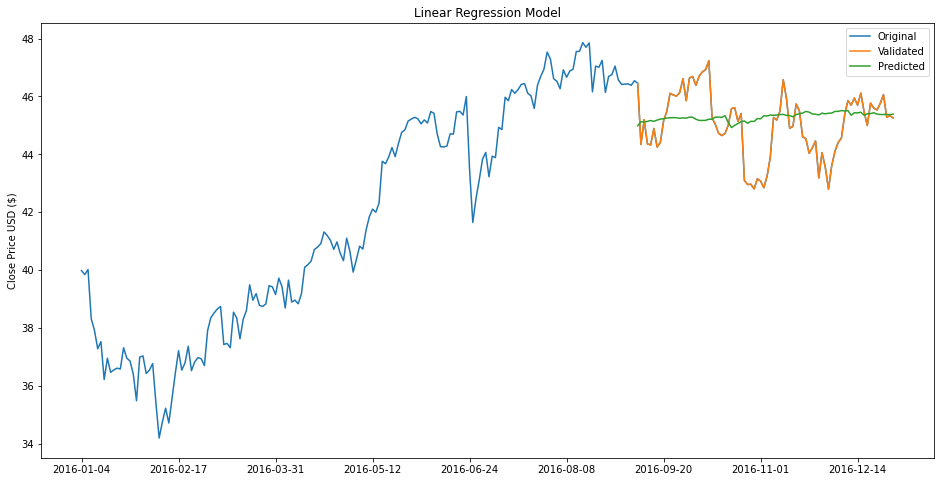

In [14]:
valid = Close0[X.shape[0]:]
valid['Prediction'] = lr_pred
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.ylabel('Close Price USD ($)')
plt.plot(Close0['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original', 'Validated', 'Predicted'])
plt.xticks(np.arange(0, len(Close0['Close'])+1, 30))
plt.show()

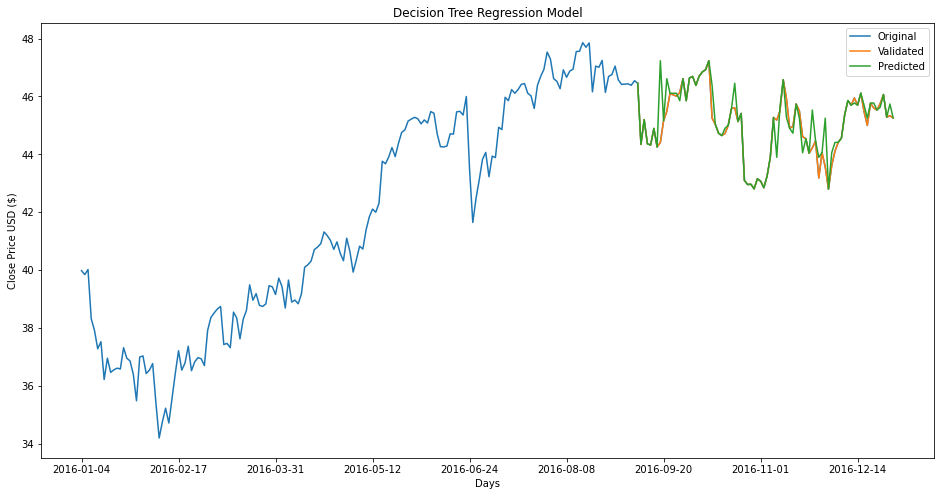

In [15]:
valid = Close0.iloc[X.shape[0]:, :]
valid['Prediction'] = tree_pred
plt.figure(figsize=(16,8))
plt.title('Decision Tree Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(Close0['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original', 'Validated', 'Predicted'])
plt.xticks(np.arange(0, len(Close0['Close'])+1, 30))
plt.show()

In [16]:
# It seems like when predicting 60 days worth of stock prices for 'a' stock, the Decision Tree Regressor Model works best